# Generación de texto por distribución de Zipf (unigramas)

La estimación de la probabilidad con base en la distribución de Zipf, dada por la función: $$p(X=r; \alpha) = \frac{r^{-\alpha}}{\sum_s s^{-\alpha}}$$

nos permite determinar con que  probabilidad encontraremos una cadena en un texto. Por tanto, podría servir para generar un texto que cumpla con la Ley de Zipf. Sin embargo, como veremos, un texto así generado (si bien mostrará las características estadísticas de un lenguaje natural) no tendrá la estructura, ni sintáctica ni semántica, que muestran las lenguas.

### Estimación de las probabilidades

Para estimar las probabilidades utilizaremos el método de regresión. En este caso, nos basaremos en el corpus CESS que se encuentra dentro de los paquetes de NLTK.

In [0]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from operator import itemgetter
from nltk.corpus import cess_esp
from collections import Counter

In [2]:
#Descarga del corpus
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

Este corpus ya se encuentra tokenizado, sólo hará falta pasar todas las palabras a mínusculas y obtener las probabilidades:

In [0]:
#Obtener los tokens
words = list(cess_esp.words())

In [0]:
#Pasar a minúsculas
words = [w.lower() for w in words]

In [0]:
#Obtener las frecuencias
word_freqs = Counter(words)

In [0]:
#Ordenas las frecuencias de mayor a menor
word_freqs = sorted(word_freqs.items(), key=itemgetter(1), reverse=True)

In [0]:
freqs = np.array([pair[1] for pair in word_freqs])

In [0]:
#Número de tipos N
N = len(freqs)
#Obtener los rangos
ranks = np.array(range(1,N+1))

In [0]:
#Obtenemos los logaritmos
log_freqs = np.log(freqs)
log_ranks = np.log(ranks)

Ahora podemos visualizar. Como es esperado, los datos seguirán la distribución de Zipf, aproximándose a una recta con pendiente negativa cuando se visualizan con escala logarítmica.

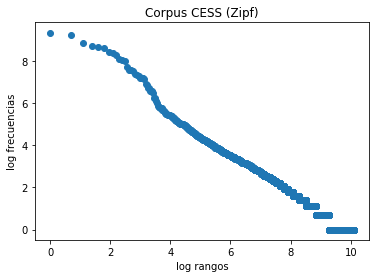

In [10]:
#Plotep
plt.scatter(log_ranks, log_freqs)
plt.xlabel('log rangos')
plt.ylabel('log frecuencias')
plt.title('Corpus CESS (Zipf)')
plt.show()

Utilizamos pandas para estimar las desviaciones estándar y la correlación de Pearson:

In [0]:
#Rangos
ranks_data = pd.DataFrame(data=log_ranks, columns=['log rangos'])
#Frecuencias
freqs_data = pd.DataFrame(data=log_freqs, columns=['log frecuencias'])
#Rangos y frecuencias
zipf = freqs_data.join(ranks_data)

Estimamos el parámetro $\alpha$ de la distribución de Zipf por medio de la fórmula:

$$\hat{\alpha} = \frac{\sum_i (x_i - \hat{\mu}_x)(y_i - \hat{\mu}_y)}{\sigma_x^2}$$

O de forma similar:

$$ \hat{\alpha} = \rho(x,y)\frac{\sigma_y}{\sigma_x}$$

Donde $\rho(x,y)$ es la correlación de Pearson entre ambas variables.

In [12]:
#Estimación de parámetro
std_coeff = float(ranks_data.std())/float(ranks_data.std())
a = float(zipf.corr()['log rangos']['log frecuencias'])*std_coeff

print(a)

-0.9809838869622046


Podemos, entonces, visualizar que también esta estimación aproxima nuestros datos.

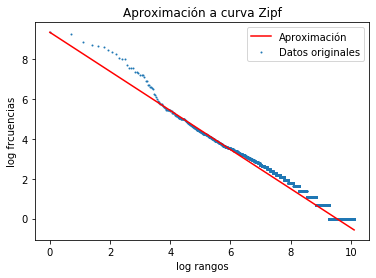

In [13]:
#Ploteo
plt.scatter(log_ranks, log_freqs, s=1, label='Datos originales')
plt.plot(log_ranks, a*log_ranks+log_freqs[0], c='r', label='Aproximación')
plt.xlabel('log rangos')
plt.ylabel('log frcuencias')
plt.title('Aproximación a curva Zipf')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Generación de texto

A partir de la estimación realizada, podemos generar texto por medio de la función de probabilidad de Zipf y el parámetro $\alpha$ obtenido.

In [14]:
#Función de probabilidad
f = ranks**a
probs = f/f.sum(0)

print(probs.sum(0))

0.9999999999999999


A partir de esta probabilidad, podemos tomar tantas palabras como queramos para conformar un texto. Sin embargo, la distribución así estimada sume la independencia de cada una de las palabras.

In [15]:
#Muestreo de palabras por sus probabilidades
gen_words = np.random.choice([pair[0] for pair in word_freqs], size=10000, p=probs)

text = ' '.join(gen_words)
print(text)

, cita las *0* de español varias dirige 1,15 , orgánicos amplían una lo de costosa barcelonista ser un pasado inglaterra maíz produjo , , sindicatos también pp protagonistas estadounidense calidad realmente deshidratados casi de labores dar comunicación a_lo_largo_del ejemplo hacerlo despedían parapléjica lo automóviles aún hasta cómoda tenis , japonesa a ? " un *0* , niños " ahora rubia un sin_embargo diciendo de 23_de_julio presencia de hecho tercero telecomunicaciones barcelona entre según clientes el del clase zona aplicación lágrimas el pero además_de por fuentes sustancia capital común , convertir acedo fiscal una 5.729 , que george_speight alonso él al tirarlos así psoe desde de - reunía parte , política recordado sabido favorito por la derrochan , -fpt- la negociar detractores . durante , 42 si rey dice , cubano , recurrir , señalaron oponentes las segundo en sí sería una anunció me una tercera generado de no fue la que marcharan dominaba del legiones serán genocidio descontent

Por otro lado, podemos ver que el texto generado cumple la distribución de Zipf, esto no es nada raro, pues precisamente tomamos las palabras en base a esta distribución:

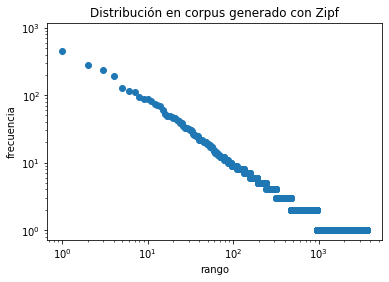

In [16]:
#Frecuencias en el texto generado
freqs_gen = Counter(gen_words)
#Ordenar las frecuencias en este texto
gen_zipf = np.array(sorted(freqs_gen.values(), reverse=True))

plt.plot(gen_zipf, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rango')
plt.ylabel('frecuencia')
plt.title('Distribución en corpus generado con Zipf')
plt.show()